In [42]:
import time
import numpy as np
import sounddevice as sd
from queue import Queue
from utils import UltraSigGen
from audioBuffer import AudioBuffer

fs = 44100
sg = UltraSigGen( frequency=10000, sampleRate=44100 )

ab = AudioBuffer()
block = []
duration_secs = 5

for _ in range(44100 * duration_secs ):
    block.extend( sg.get( 1 ) )


In [29]:
ab.put( block )

start = time.time()
while time.time() - start < duration_secs:
    time.sleep(1)

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun o

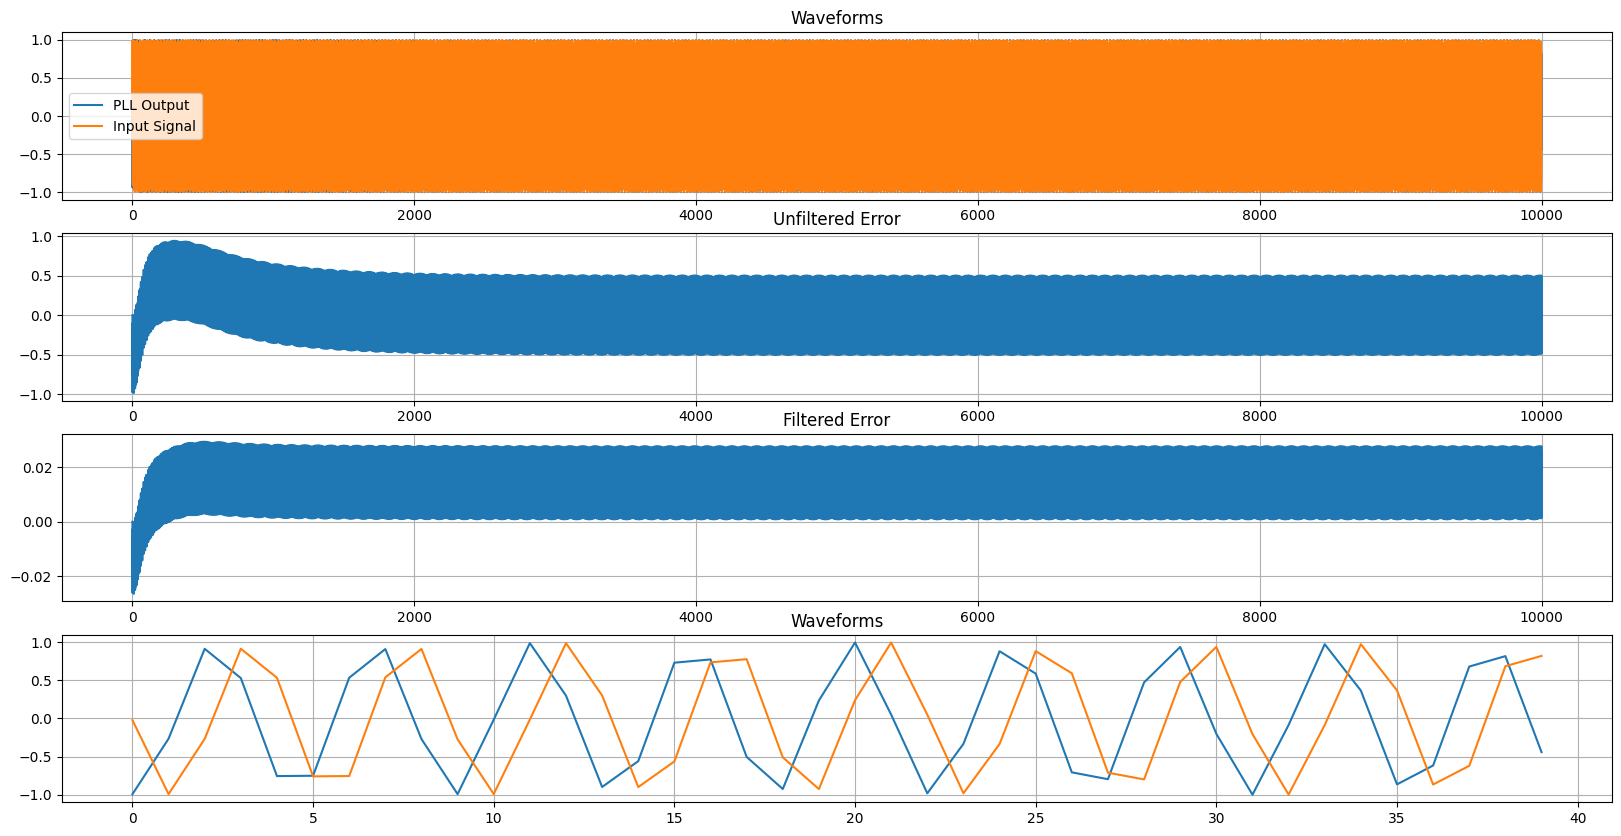

In [34]:
from PLL import PhaseLockedLoop
import matplotlib.pyplot as plt


K_p = 0.2667 / 10
K_i = 0.0178 * 100
K_0 = 1
in_f_Hz   = 9900

e_D = [] # phase-error output
e_F = [] #Filtered phase-error output
cos_out = []



pll = PhaseLockedLoop( K_i, K_p, K_0, in_f_Hz, fs )
in_sig = block[:10000]
for n in range(len(in_sig)):
    _cos_out, _sin_out, _e_D, _e_F = pll.proc( in_sig[n] )
    
    cos_out.append( _cos_out )
    e_D.append( _e_D )
    e_F.append( _e_F )

# Create a Figure
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

# Set up Axes
ax1 = fig.add_subplot(411)
ax1.plot(cos_out, label='PLL Output')
plt.grid()
ax1.plot(in_sig, label='Input Signal')
plt.legend()
ax1.set_title('Waveforms')

# Show the plot
#plt.show()

ax2 = fig.add_subplot(412)
ax2.plot( e_D )
plt.grid()
ax2.set_title('Unfiltered Error')

ax3 = fig.add_subplot(413)
ax3.plot( e_F )
plt.grid()
ax3.set_title('Filtered Error')

ax4 = fig.add_subplot(414)
ax4.plot(cos_out[int(-fs/in_f_Hz)*10:], label='PLL Output')
plt.grid()
ax4.plot(in_sig[int(-fs/in_f_Hz)*10:], label='Input Signal')
ax4.set_title('Waveforms')

plt.show()

In [ ]:
in_sig = block
cos_out = []

for n in range(len(in_sig)):
    _cos_out, _sin_out, _e_D, _e_F = pll.proc( in_sig[n] )
    
    cos_out.append( _cos_out )
print( len(cos_out) )
ab.put(cos_out)

In [40]:
import time
import numpy as np
import sounddevice as sd
from queue import Queue
from utils import UltraSigGen
from audioBuffer import AudioBuffer

fs = 44100
sg = UltraSigGen( frequency=9900, sampleRate=44100 )

ab = AudioBuffer()
block = []
duration_secs = 5

for _ in range(44100 * duration_secs ):
    block.extend( sg.get( 1 ) )

ab.put( block )

start = time.time()
while time.time() - start < duration_secs:
    time.sleep(1)

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun o